# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Оценки параметров и сбор данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb и **в формате html**, который можно получить как `File -> Download as -> HTML`.
* Теоретические задачи необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив;
  * фотографией, **встроенной в ноутбук** посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Теоретические задачи не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта. Неправильно вставленные фотографии могут не передаться при отправке.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 3 балла
* Задача 2 &mdash; 5 баллов
* Задача 3 &mdash; 12 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 6 баллов
* Задача 5 &mdash; 10 баллов

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import requests
from time import sleep
import json

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

**a)** Заметим, что
$$ \frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2 = 
    \frac1n\sum\limits_{i=1}^n X_i^2 - 
    \frac2n\sum\limits_{i=1}^n X_i \overline{X} +  
    \frac1n\sum\limits_{i=1}^n \overline{X}^2 = 
    \overline{X^2} - \frac{2\overline{X}}{n}\sum\limits_{i=1}^n X_i - \overline{X}^2 =
    \overline{X^2} - 2\overline{X}^2 + \overline{X}^2 = S^2.
$$

**b)** Вычислим
$$ \mathsf{E}S^2 = \mathsf{E}\overline{X^2} - \mathsf{E}\overline{X}^2 = 
    \mathsf{E}X^2 - \mathsf{E}\left(\overline{X} - \mathsf{E}\overline{X} + \mathsf{E}\overline{X}\right)^2=
    \mathsf{E}X^2 - {\sf D}\overline{X} - 
    2\mathsf{E}\left(\overline{X} - \mathsf{E}\overline{X}\right)\mathsf{E}\overline{X} - 
    \left(\mathsf{E}\overline{X}\right)^2 = 
    {\sf D}X - {\sf D}\overline{X} = (1 - \frac1n) {\sf D}X.
$$
В последнем равенстве было использовано то, что ${\sf D}\overline{X} = \frac{n \cdot {\sf D}X}{n^2} = \frac{{\sf D}X}{n}$, так как $X_1, \ldots X_n$ независимы.

Значит $S^2$ - смещённая оценка дисперсии $X$.

 ---
### Задача 2.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** Из результатов выще - первая не является несмещённой, а вторая является.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Далее вычислите среднее этих оценок, которое обозначим $\overline{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\overline{\theta}, y)$, где $y$ &mdash; произвольные различные (например 0, 1, 2) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите также презентацию с разбора задания 1. **Если график чему-то не удовлетворяет, оценка может быть снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`.

**Решение:**

In [15]:
import scipy.stats as sps

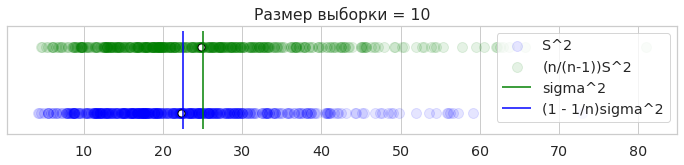

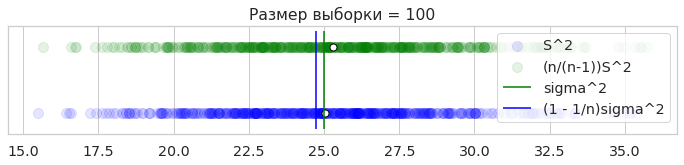

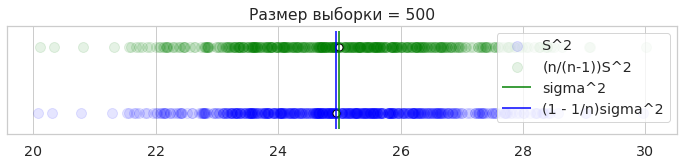

In [16]:
sigma2 = 25
k = 500

for n in [10, 100, 500]:
    samples = sps.norm.rvs(loc=0, scale=sigma2 ** 0.5, size=(k, n))
    
    estimations = np.var(samples, axis=1)
    corrected_estmts = (n / (n - 1)) * estimations
    
    plt.figure(figsize=(12,2))
    
    plt.scatter(estimations, np.zeros(k) + 1, 
            alpha=0.1, s=100, color="blue", label="S^2")
    plt.scatter(estimations.mean(), 1, marker='.', s=200, 
            color='w', edgecolors='black')
    
    plt.scatter(corrected_estmts, np.zeros(k) + 2, 
            alpha=0.1, s=100, color="green", label="(n/(n-1))S^2")
    plt.scatter(corrected_estmts.mean(), 2, marker='.', s=200, 
            color='w', edgecolors='black')

    plt.vlines(sigma2, 0.75, 2.25, color='g', label="sigma^2")
    plt.vlines(sigma2 - 1 / n * sigma2, 0.75, 2.25, color='b', label="(1 - 1/n)sigma^2")
    plt.title(f'Размер выборки = {n}')
    plt.yticks([])
    plt.legend()
    
    plt.show()

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\overline{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://mipt-stats.gitlab.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. Какие из оценок являются асимптотически несмещёнными, т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$?

**Решение:**

In [17]:
sigma2 = 25

k = 50000
maxn = 500

samples = sps.norm.rvs(loc=0, scale=sigma2 ** 0.5, size=(k, maxn))
counts = np.ones(maxn).cumsum()

means = samples.cumsum(axis=1) / counts
means_sq = means ** 2

squares = samples ** 2
sq_means = squares.cumsum(axis=1) / counts

estimations = (sq_means - means_sq).mean(axis=0)

minn = 10

counts = counts[minn:]
estimations = estimations[minn:]

corrected_estmts = (counts / (counts - 1)) * estimations

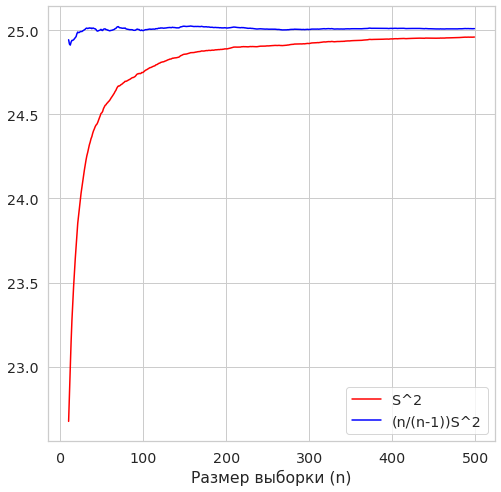

In [18]:
x = np.arange(minn, maxn)

plt.figure(figsize=(8, 8))

plt.plot(x, estimations, color="red", label="S^2")
plt.plot(x, corrected_estmts, color="blue", label="(n/(n-1))S^2")

plt.xlabel("Размер выборки (n)")
plt.legend()

plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** 

Асимптотически обе оценки являются несмещёнными. 

Для данных двух оценок заметно, что свойство несмещённости обеспечивает независимость смещения от размера выборки 
(конечно, это не следствие, можно, например, сместить оценку на константу).


Что такое свойство несмещённости, я затрудняюсь задать лучше, чем в определении:
это такая оценка параметра, матожидание которой равно этому параметру для любого его значения.

Данные эксперименты подтверждают наличие свойства несмещённости у второй оценки
и его отсутствие у первой.

В лабораторных по физике используют $n-1$ в знаменателе вместо $n$, видимо, для получения несмещённой оценки.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

 ---
### Задача 3.   

В этой задаче вам нужно будет проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a>. Для сбора данных рекомендуется использовать <a target="_blank" href="https://dev.hh.ru/">официальное API</a>.

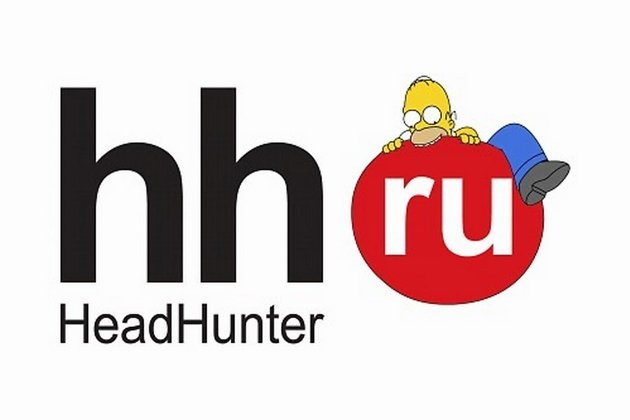

**1. Сбор данных**

Соберите данные о вакансии Data Scientist по Москве в одну таблицу и подготовьте их для анализа. Часто в индустрии подготовленные для анализа таблицы называют *витринами*. В ней должны быть:
- название вакансии,
- работодатель,
- зарплатная вилка,
- станция метро,
- ссылка на вакансию,
- опыт,
- требуемые навыки,
- что-то еще по вашему желанию.

Креативность приветствуется. При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. 

**При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер HeadHunter.**

In [19]:
import requests

In [21]:
URL = 'https://api.hh.ru/vacancies/'

unprepared_vacs = list()

maximum = 2000
per_page = 20
for n in range(maximum // per_page):
    #print(f"page {n}, got {len(unprepared_vacs)}")
    page = requests.get(URL, {
        'text': "Data Scientist",
        'area': 1, # Москва
        'page': n,
        'per_page': per_page
    }).json()["items"]
    
    if len(page) == 0:
        break
    
    for vac in page:
        ident = vac.get("id")
        vac = requests.get(URL + ident).json()
        unprepared_vacs.append(vac)
        
        sleep(0.1)

In [22]:
def prepare(vac):
    name = vac.get("name")
    name = name.strip().lower() if name else ""
        
    employer = vac.get("employer")
    emp_name, = get(employer, ["name"])

    salary = vac.get("salary")
    sal_from, sal_to, sal_gross, sal_currency = \
        get(salary, ["from", "to", "gross", "currency"])

    address = vac.get("address")
    stations, = get(address, ["metro_stations"])
    station = stations[0] if stations and len(stations) else None
    station_name, station_lng, station_lat = get(station, ["station_name", "lat", "lng"])

    url = vac.get("alternate_url")

    experience = vac.get("experience")
    exp_name, = get(experience, ["name"])

    vac_skills = vac.get("key_skills")
    skills = [skill.get("name") for skill in vac_skills] if vac_skills else []
    skills = [skill.strip().lower() for skill in skills]

    return [name, url, emp_name, sal_from, sal_to, sal_gross, \
            sal_currency, station_name, station_lng, station_lat, exp_name, skills]

def get(obj, fields):
    if not obj:
        return [None] * len(fields)
    return [obj.get(field) for field in fields]

prepared_vacancies = [prepare(vac) for vac in unprepared_vacs]

In [23]:
from difflib import SequenceMatcher

def similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [24]:
skills = set([skill for vac in prepared_vacancies for skill in vac[-1]])

skillsd = dict()
skill_count = 0
for skill in skills:
    for another in skillsd.keys():
        if similarity(skill, another) > 0.85:
            skillsd[skill] = skillsd[another]
            break
    else:
        skillsd[skill] = skill_count
        skill_count += 1

In [25]:
def skills_vectorize(skills):
    vect = [0] * skill_count
    for skill in skills:
        vect[skillsd[skill]] = 1
    return vect

In [26]:
vacancies = [vac[:-1] + skills_vectorize(vac[-1]) for vac in prepared_vacancies]

In [27]:
standard_columns = ["name", "url", "employer", "salary_from", "salary_to", \
           "is_gross", "currency", "station", "st_lng", "st_lat", "experience"]

skill_columns = list()
for skill, pos in skillsd.items():
    if pos < len(skill_columns):
        skill_columns[pos] += ", " + skill
    else:
        skill_columns.append(skill)
        
columns = standard_columns + skill_columns

In [28]:
df = pd.DataFrame(vacancies, columns=columns)
df.to_csv("vacancies.csv")

**2. Анализ и визуализация данных**

Проведите исследование получившихся данных. Прежде всего убедитесь, что ваши данные чистые. Убедитесь, что вы проделали следующее:
- удаление дубликатов,
- предобработка пропусков,
- предобработка текстовых данных.

Среди вакансий можно выделять группы. *Например*, бизнес-аналитик, BI аналитик, продуктовый аналитик.

Ответьте не следующие вопросы:  
- Сколько сейчас доступно вакансий по вашему запросу?
- Выделяются ли среди вакансий какие-то группы? 
- Какие группы вакансий самые популярные?
- Какова средняя и медианная заработная плата?
- Какие ключевые навыки требуются для данной вакансии?
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию &mdash; для этого используйте библиотеку plotly. Постройте следующие графики:
- гистограмма распределения заработной платы;
- heatmap, отображающий зависимость количества вакансий от группы и навыка;
- зависимость средней заработной платы от требуемых навыков;
- распределение средней заработной платы по карте Москвы;
- распределение спроса на вакансию по карте Москвы.

Для построения последних двух графиков вам могут понадобиться <a target="_blank" href="http://www.lovrikinfo.ru/metrogps.php">внешние данные</a>.


In [200]:
df = pd.read_csv("vacancies.csv")
df.head()

,Unnamed: 0,name,url,employer,salary_from,salary_to,is_gross,currency,station,st_lng,...,научные исследования,нейронные сети,opera,постановка задач разработчикам,start-up project,apache,recsys,microsoft access,gradle,airflow
0,0,стажер data scientist,https://hh.ru/vacancy/44150000,"СИБУР, Группа компаний",NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,аналитик data scientist,https://hh.ru/vacancy/44132320,Стоматорг,180000.0,250000.0,True,RUR,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,data scientist в области компьютерного зрения,https://hh.ru/vacancy/43896076,Fair Print & High Store,150000.0,150000.0,False,RUR,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,3,data scientist / machine learning engineer // ...,https://hh.ru/vacancy/42857558,Wisebits,4000.0,NaN,False,EUR,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,data scientist / quantitative researcher,https://hh.ru/vacancy/43471916,Знаменка Капитал,250000.0,NaN,True,RUR,Кропоткинская,55.745297,...,0,0,0,0,0,0,0,0,0,0


In [201]:
# Восстановим skill_columns
skill_columns = df.columns[12:]

In [202]:
# Доступно вакансий
df.shape[0]

339

In [204]:
# Дубликатов (особо) не наблюдается
df["url"].nunique()

338

Более-менее четко удалось выделить следующие группы:

In [205]:
df.loc[:, "group"] = None
df.loc[df["name"].str.contains("nlp"), "group"] = "nlp"
df.loc[df["name"].str.contains("engineer|инженер"), "group"] = "engineer"
df.loc[df["name"].str.contains("ml|machine learning|маш"), "group"] = "ml"
df.loc[df["name"].str.contains("analyst|аналит"), "group"] = "analyst"
df.loc[df["name"].str.contains("bi|бизн"), "group"] = "bi"
df.loc[df["name"].str.contains("computer vision|cv"), "group"] = "cv"
df.loc[df["name"].str.contains("rec|рекоменд"), "group"] = "cv"
df.loc[df["name"].str.contains("big|больш"), "group"] = "big-data"

In [206]:
# Популярность групп
df.groupby("group")["name"].count().sort_values(ascending=False)

group
analyst     38
engineer    37
ml          22
cv          18
nlp         11
bi          10
big-data    10
Name: name, dtype: int64

In [207]:
# Будем считать зарплатой среднее между максимальной и минимальной
df["salary_to"].mask(df["salary_to"].isna(), df["salary_from"], inplace=True)
df["salary_from"].mask(df["salary_from"].isna(), df["salary_to"], inplace=True)

df.loc[:,"salary"] = (df["salary_to"] + df["salary_from"]) / 2

In [208]:
# Какие встречаются валюты
df["currency"].unique()

array([nan, 'RUR', 'EUR', 'USD'], dtype=object)

In [209]:
# Переведем значения в рубли после вычета налогов
df["salary"].mask(df["currency"] == "EUR", df["salary"] * 95, inplace=True)
df["salary"].mask(df["currency"] == "USD", df["salary"] * 75, inplace=True)
df["salary"].mask(df["is_gross"] == True, df["salary"] * 0.87, inplace=True)

In [210]:
# Описательные статистики заработной платы
df["salary"].describe()

count        55.000000
mean     208311.818182
std       90641.251494
min       45000.000000
25%      150000.000000
50%      195750.000000
75%      255500.000000
max      435000.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Гистограмма распределения ЗП')

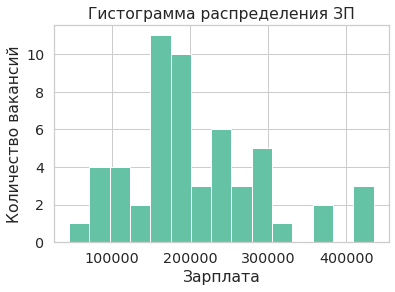

In [211]:
ax = df["salary"].hist(bins=15)
ax.set_xlabel("Зарплата")
ax.set_ylabel("Количество вакансий")
ax.set_title("Гистограмма распределения ЗП")

Видно, что зарплата сосредоточена вокруг 200к. Наблюдаются выбросы, но это может быть
связано методом вычисления зарплаты из данных (или не данных) минимальной и максимальной зарплат.

In [212]:
# Найдем самые желаемые скиллы
skill_freqs = df[skill_columns].sum()
wanted_skills = list(skill_freqs.sort_values(ascending=False)[:15].index)
wanted_skills

['r/python, python, python 3',
 'sql',
 'data mining',
 'английский язык',
 'git',
 'linux',
 'математическая статистика',
 'spark',
 'hadoop',
 'machine learning',
 'анализ данных, аналитик данных',
 'c++',
 'data science',
 'ms sql',
 'big data']

Text(0.5, 1.0, 'Плотность вакансий')

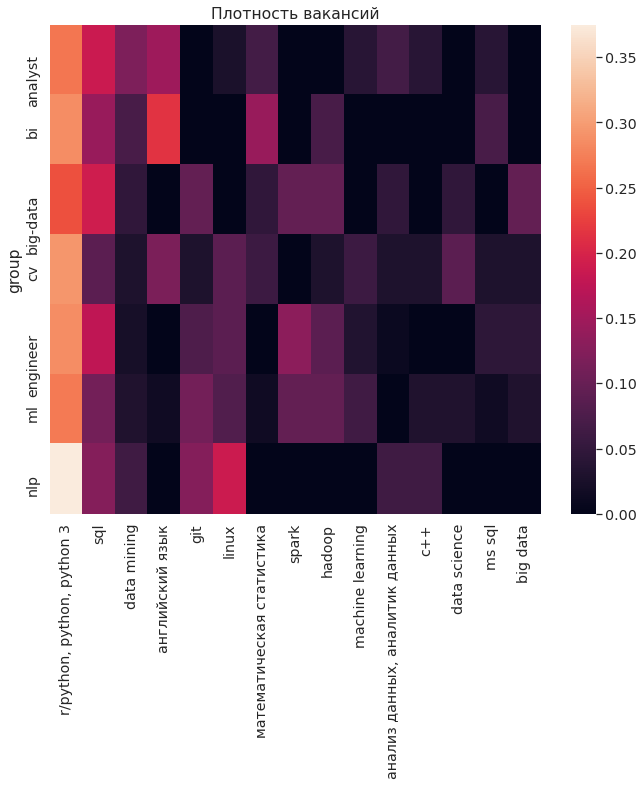

In [214]:
# Построим heatmap по группе и скилу
skillsdf = df[["group"] + wanted_skills]
skillsdf = skillsdf.groupby("group").sum()
skillsdf = skillsdf.div(skillsdf.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(skillsdf)
ax.set_title("Плотность вакансий")

Заметно, что R или python требуется почти везде. Также довольно популярен sql. Для инженера, МЛ и NLP важны git и linux. Для инженера, МЛ и биг-дата важны spark и hadoop.

In [215]:
skill_salary = pd.DataFrame(
    [(skill, df[df[skill] == 1]["salary"].mean()) for skill in wanted_skills],
    columns=["skill", "salary"]
)

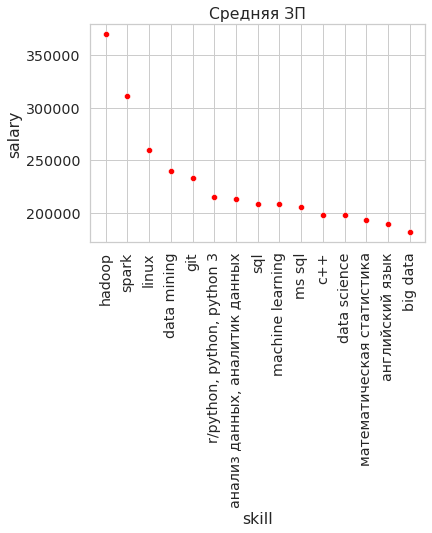

In [216]:
# Построим зависимость средней ЗП от скила
ax = sns.scatterplot(
    data=skill_salary.sort_values("salary", ascending=False), 
    x="skill", y="salary", color="r"
)
ax.set_title("Средняя ЗП")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

Похоже, spark и hadoop ценятся чуть ли не в полтора раза больше, чем остальные скиллы.

In [217]:
# Как часто требуют различный опыт?
df.groupby("experience")["name"].count().sort_values(ascending=False)

experience
От 1 года до 3 лет    152
От 3 до 6 лет         140
Нет опыта              34
Более 6 лет            13
Name: name, dtype: int64

Очень большой опыт требуется редко. Не мало вакансий без опыта.

In [218]:
# Топ работодателей
df.groupby("employer")["name"].count().sort_values(ascending=False)[:10]

employer
Сбербанк                                               55
Ozon                                                    9
РАБЛЗ                                                   8
Mail.ru Group                                           5
МегаФон                                                 5
NielsenIQ                                               5
Банк ВТБ (ПАО)                                          5
HUAWEI                                                  4
Газпром-медиа Развлекательное телевидение (ГПМ РТВ)     4
Яндекс                                                  4
Name: name, dtype: int64

Сберу требуются датасаентисты. Ожидаемо: у них много данных.

In [219]:
# Топ местоположений вакансий
df.groupby("station")["name"].count().sort_values(ascending=False)[:10]

station
Кутузовская      13
Маяковская       10
Деловой центр     8
Аэропорт          6
Тульская          6
Технопарк         5
Павелецкая        4
Белорусская       4
Балтийская        3
Проспект Мира     3
Name: name, dtype: int64

In [178]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

street_map = gpd.read_file("Moscow-shp/shape/roads.shp")

In [220]:
by_station = df.dropna(subset=["station"])

# Отсеиваем ненужные станции
by_station = by_station[by_station["st_lng"] > 55]
by_station = by_station[by_station["st_lng"] < 56]

by_station = by_station.groupby("station").agg(
    {"salary" : "mean", "name": "count", "st_lng" : "first", "st_lat" : "first"}
)

In [221]:
crs = {"init":"EPSG:4326"}

geometry = [Point(xy) for xy in zip(by_station["st_lat"], by_station["st_lng"])]
geo_df = gpd.GeoDataFrame(by_station,
    crs = crs,
    geometry = geometry
)

/usr/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


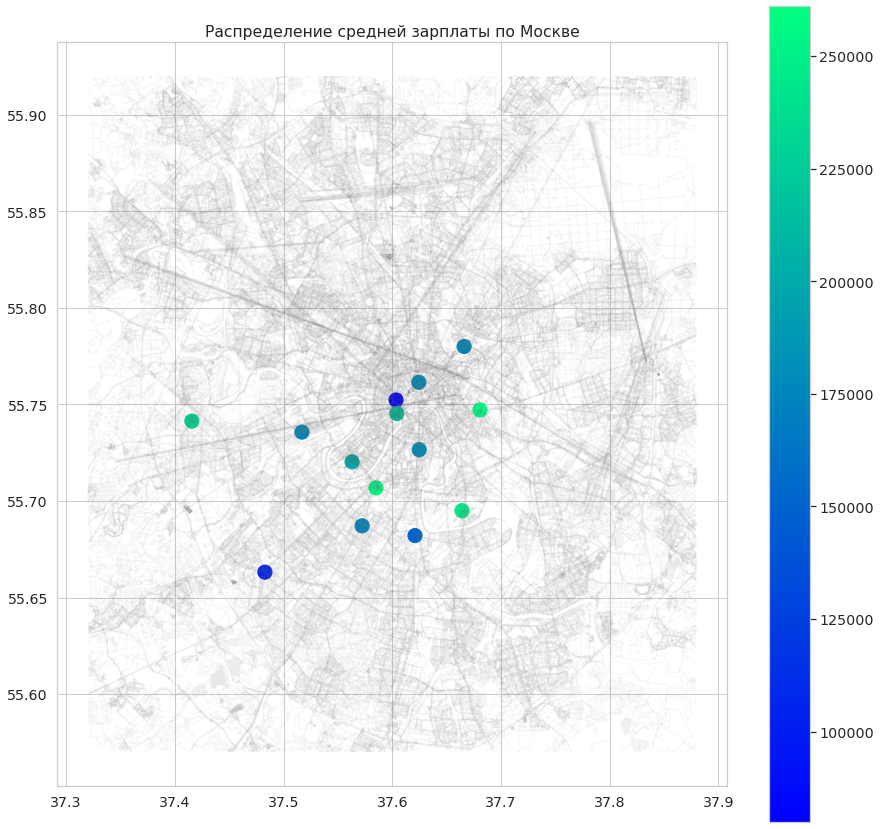

In [222]:
# Распределение средней зарплаты по Москве
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.05, color="grey")

geo_df.plot(column="salary", ax=ax, legend=True, markersize=200, cmap="winter")

ax.set_title("Распределение средней зарплаты по Москве")

plt.show()

Тут данных довольно мало, трудно что-то сказать.

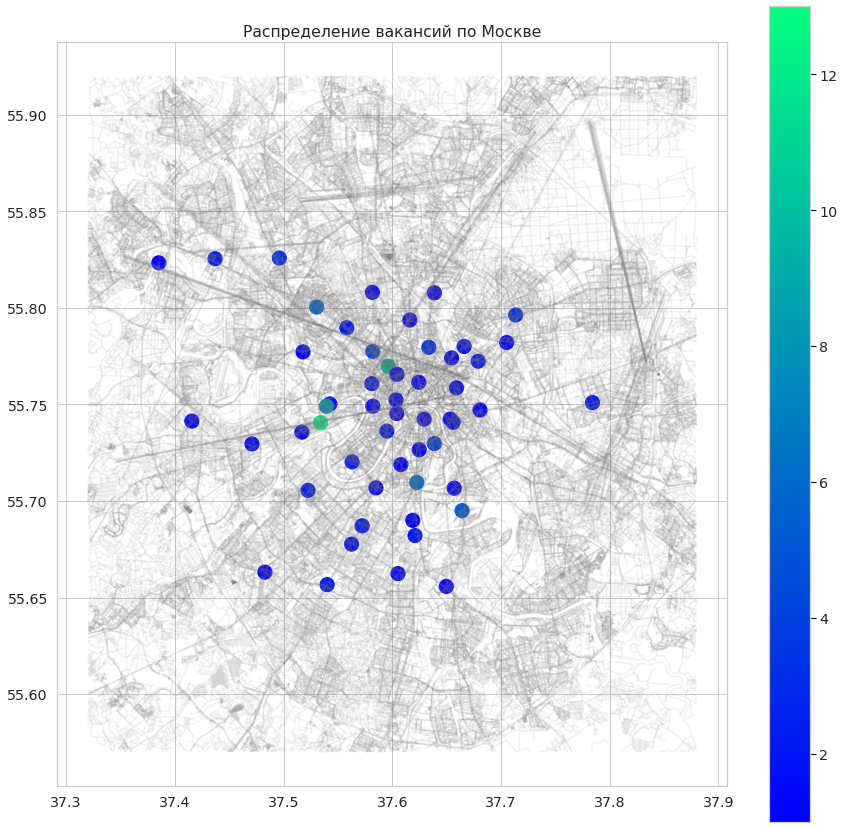

In [223]:
# Распределение вакансий по Москве
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.1, color="grey")

geo_df.plot(column="name", ax=ax, legend=True, markersize=200, cmap="winter")

ax.set_title("Распределение вакансий по Москве")

plt.show()

Тут распределение довольно равномерное. Пик наблюдается на Кутузовской и Маяковской. На Кутузовской вроде как находится офис Сбербанка.

Какие выводы можно сделать из построенных графиков?

Все выводы приведины прямо под графиками.

**3. Анализ профессии, о которой вы мечтали в детстве**

Проведите аналогичное исследование для профессии, о которой вы мечтали в детстве. Это может быть повар, учитель, пожарный и т.д. &mdash; все зависит от вас ☺.

***Я с детства мечтал быть Data Scientist-ом!***

Ладно, изучим что-нибудь другое.

In [92]:
URL = 'https://api.hh.ru/vacancies/'

unprepared_vacs = list()

maximum = 2000
per_page = 20
for n in range(maximum // per_page):
    #print(f"page {n}, got {len(unprepared_vacs)}")
    page = requests.get(URL, {
        'text': "Кассир",
        'area': 1, # Москва
        'page': n,
        'per_page': per_page
    }).json()["items"]
    
    if len(page) == 0:
        break
    
    for vac in page:
        ident = vac.get("id")
        vac = requests.get(URL + ident).json()
        unprepared_vacs.append(vac)
        
        sleep(0.1)

In [93]:
def prepare(vac):
    name = vac.get("name")
    name = name.strip().lower() if name else ""
        
    employer = vac.get("employer")
    emp_name, = get(employer, ["name"])

    salary = vac.get("salary")
    sal_from, sal_to, sal_gross, sal_currency = \
        get(salary, ["from", "to", "gross", "currency"])

    address = vac.get("address")
    stations, = get(address, ["metro_stations"])
    station = stations[0] if stations and len(stations) else None
    station_name, station_lng, station_lat = get(station, ["station_name", "lat", "lng"])

    url = vac.get("alternate_url")

    experience = vac.get("experience")
    exp_name, = get(experience, ["name"])

    vac_skills = vac.get("key_skills")
    skills = [skill.get("name") for skill in vac_skills] if vac_skills else []
    skills = [skill.strip().lower() for skill in skills]

    return [name, url, emp_name, sal_from, sal_to, sal_gross, \
            sal_currency, station_name, station_lng, station_lat, exp_name, skills]

def get(obj, fields):
    if not obj:
        return [None] * len(fields)
    return [obj.get(field) for field in fields]

prepared_vacancies = [prepare(vac) for vac in unprepared_vacs]

In [94]:
from difflib import SequenceMatcher

def similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [95]:
skills = set([skill for vac in prepared_vacancies for skill in vac[-1]])

skillsd = dict()
skill_count = 0
for skill in skills:
    for another in skillsd.keys():
        if similarity(skill, Наблюдаютсяanother) > 0.85:
            skillsd[skill] = skillsd[another]
            break
    else:
        skillsd[skill] = skill_count
        skill_count += 1

In [96]:
def skills_vectorize(skills):
    vect = [0] * skill_count
    for skill in skills:
        vect[skillsd[skill]] = 1
    return vect

In [97]:
vacancies = [vac[:-1] + skills_vectorize(vac[-1]) for vac in prepared_vacancies]

In [98]:
standard_columns = ["name", "url", "employer", "salary_from", "salary_to", \
           "is_gross", "currency", "station", "st_lng", "st_lat", "experience"]

skill_columns = list()
for skill, pos in skillsd.items():
    if pos < len(skill_columns):
        skill_columns[pos] += ", " + skill
    else:
        skill_columns.append(skill)
        
columns = standard_columns + skill_columns

In [143]:
df = pd.DataFrame(vacancies, columns=columns)
df.to_csv("dream_vacancies.csv")

***Обработка***

In [225]:
df = pd.read_csv("dream_vacancies.csv")
df.head()

,Unnamed: 0,name,url,employer,salary_from,salary_to,is_gross,currency,station,st_lng,...,рожковая кофемашина,современная розница,"коммуникабельность, стрессоустойчивость",1с: зарплата и управление персоналом,временная работа,цфт,валютные платежи,работа в режиме многозадачности,opera,складской учет
0,0,кассир в ресторан,https://hh.ru/vacancy/43944597,Ресторан Рыбный Базар,40000.0,40000.0,False,RUR,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,билетный кассир,https://hh.ru/vacancy/44081656,Столичная Судоходная Компания,40000.0,40000.0,False,RUR,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,кассир ресторана,https://hh.ru/vacancy/44044058,Erwin Рекамореокеан,45000.0,NaN,False,RUR,Киевская,55.74361,...,0,0,0,0,0,0,0,0,0,0
3,3,кассир,https://hh.ru/vacancy/40827226,"ЦУМ, ТД",NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,кассир,https://hh.ru/vacancy/44139525,Релакс,50000.0,NaN,True,RUR,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [226]:
# Восстановим skill_columns
skill_columns = df.columns[12:]

In [227]:
# Доступно вакансий
df.shape[0]

2000

In [228]:
# Дубликатов (особо) не наблюдается
df["url"].nunique()

1999

Более-менее четко удалось выделить следующие группы:

In [229]:
df.loc[:, "group"] = None
df.loc[df["name"].str.contains("конс"), "group"] = "консультант"
df.loc[df["name"].str.contains("адм"), "group"] = "администратор"
df.loc[df["name"].str.contains("бар"), "group"] = "бар"
df.loc[df["name"].str.contains("опер"), "group"] = "операционист"
df.loc[df["name"].str.contains("прода"), "group"] = "продавец"
df.loc[df["name"].str.contains("бух"), "group"] = "бухгалтер"

In [230]:
# Популярность групп
df.groupby("group")["name"].count().sort_values(ascending=False)

group
продавец         1056
администратор     117
бар                80
операционист       49
бухгалтер          29
консультант        19
Name: name, dtype: int64

In [231]:
# Будем считать зарплатой среднее между максимальной и минимальной
df["salary_to"].mask(df["salary_to"].isna(), df["salary_from"], inplace=True)
df["salary_from"].mask(df["salary_from"].isna(), df["salary_to"], inplace=True)

df.loc[:,"salary"] = (df["salary_to"] + df["salary_from"]) / 2

In [232]:
# Какие встречаются валюты
df["currency"].unique()

array(['RUR', nan], dtype=object)

In [233]:
# Вычтем налоги
df["salary"].mask(df["is_gross"] == True, df["salary"] * 0.87, inplace=True)

In [234]:
# Описательные статистики заработной платы
df["salary"].describe()

count      1771.000000
mean      38861.196262
std       10093.400619
min        1700.000000
25%       33000.000000
50%       36500.000000
75%       44000.000000
max      105000.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Гистограмма распределения ЗП')

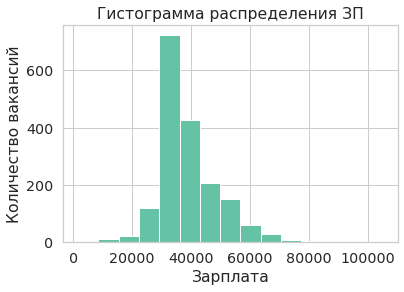

In [235]:
ax = df["salary"].hist(bins=15)
ax.set_xlabel("Зарплата")
ax.set_ylabel("Количество вакансий")
ax.set_title("Гистограмма распределения ЗП")

Видно, что зарплата сосредоточена вокруг 40к.

In [236]:
# Найдем самые желаемые скиллы
skill_freqs = df[skill_columns].sum()
wanted_skills = list(skill_freqs.sort_values(ascending=False)[:15].index)
wanted_skills

['работа в команде',
 'работа за кассой, работа с кассой',
 'пользователь пк',
 'грамотная речь',
 'кассовые операции',
 'кассовые документы',
 'обслуживание покупателей',
 'активные продажи',
 'умение работать в команде',
 'розничная торговля',
 'мерчендайзинг, мерчандайзинг',
 'консультирование',
 'навыки продаж',
 'клиентоориентированность',
 'обучение и развитие']

Text(0.5, 1.0, 'Плотность вакансий')

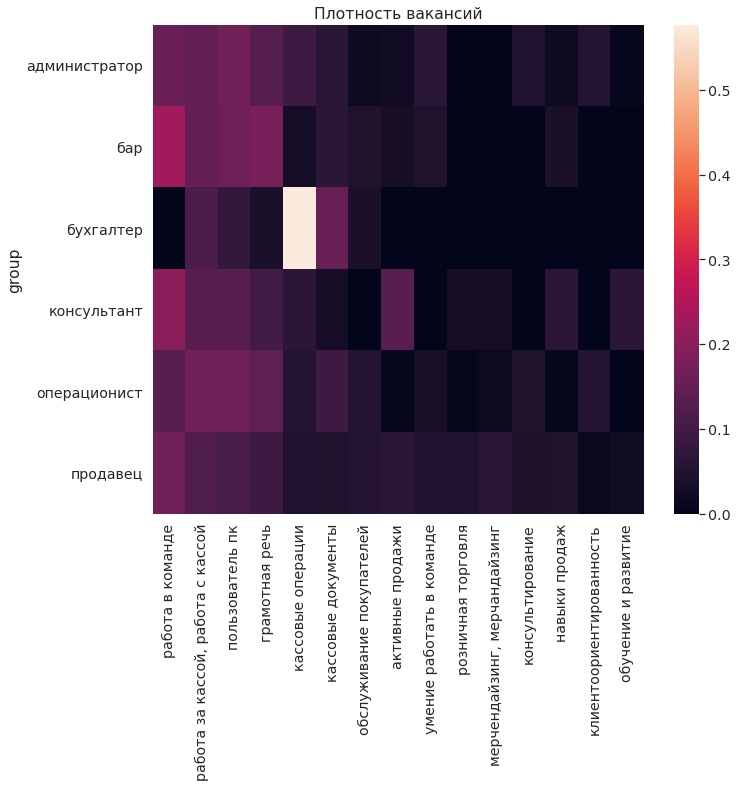

In [237]:
# Построим heatmap по группе и скилу
skillsdf = df[["group"] + wanted_skills]
skillsdf = skillsdf.groupby("group").sum()
skillsdf = skillsdf.div(skillsdf.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(skillsdf)
ax.set_title("Плотность вакансий")

Ожидаемо, почти везде важна работа с кассой, умение пользоваться ПК. Довольно популярно указывать работу в команде и грамотную речь (xD). Бухгалтеру очень важны кассовые операции.

In [238]:
skill_salary = pd.DataFrame(
    [(skill, df[df[skill] == 1]["salary"].mean()) for skill in wanted_skills],
    columns=["skill", "salary"]
)

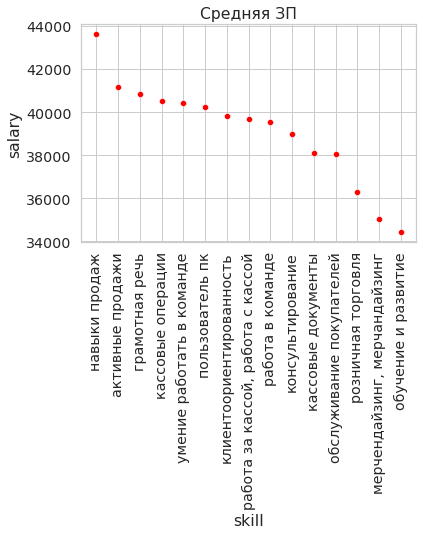

In [239]:
# Построим зависимость средней ЗП от скила
ax = sns.scatterplot(
    data=skill_salary.sort_values("salary", ascending=False), 
    x="skill", y="salary", color="r"
)
ax.set_title("Средняя ЗП")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

Ценится умение продавать. А грамотная речь вошла в топ3 (xDDDD). А развитие ценится меньше всего...

In [240]:
# Как часто требуют различный опыт?
df.groupby("experience")["name"].count().sort_values(ascending=False)

experience
Нет опыта             1337
От 1 года до 3 лет     632
От 3 до 6 лет           30
Более 6 лет              1
Name: name, dtype: int64

Особо опыта не требуется.

In [241]:
# Топ работодателей
df.groupby("employer")["name"].count().sort_values(ascending=False)[:10]

employer
Пятёрочка                 132
ВкусВилл                   46
ДИКСИ, группа компаний     43
Мэлон Фэшн Груп            33
Перекресток                32
JCat.ru                    31
Улыбка радуги              31
МК Эксперт                 29
Снежная Королева           28
Billa (розничная сеть)     27
Name: name, dtype: int64

Магазинам нужны продавцы. Ожидаемо.

In [242]:
# Топ местоположений вакансий
df.groupby("station")["name"].count().sort_values(ascending=False)[:10]

station
Пражская                    28
Домодедовская               25
Алтуфьево                   22
Аэропорт                    17
Котельники                  16
Новогиреево                 16
Бульвар Дмитрия Донского    15
Автозаводская               15
Бабушкинская                15
Выхино                      14
Name: name, dtype: int64

In [243]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

street_map = gpd.read_file("Moscow-shp/shape/roads.shp")

In [244]:
by_station = df.dropna(subset=["station"])

# Отсеиваем ненужные станции
by_station = by_station[by_station["st_lng"] > 55]
by_station = by_station[by_station["st_lng"] < 56]

by_station = by_station.groupby("station").agg(
    {"salary" : "mean", "name": "count", "st_lng" : "first", "st_lat" : "first"}
)

In [245]:
crs = {"init":"EPSG:4326"}

geometry = [Point(xy) for xy in zip(by_station["st_lat"], by_station["st_lng"])]
geo_df = gpd.GeoDataFrame(by_station,
    crs = crs,
    geometry = geometry
)

/usr/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


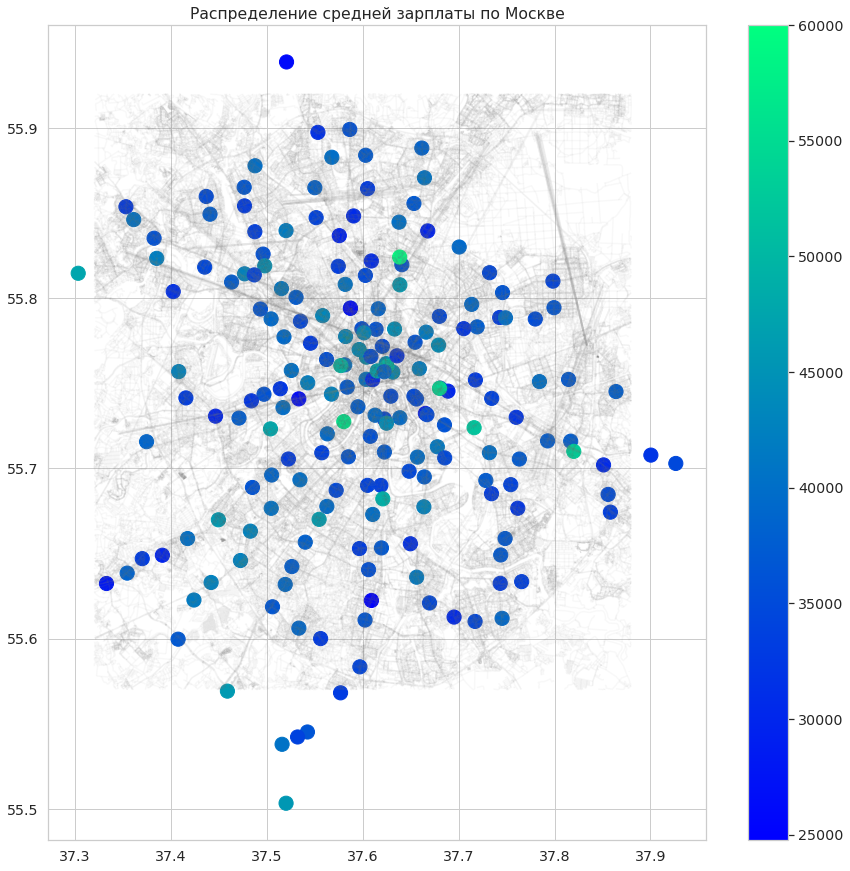

In [246]:
# Распределение средней зарплаты по Москве
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.05, color="grey")

geo_df.plot(column="salary", ax=ax, legend=True, markersize=200, cmap="winter")

ax.set_title("Распределение средней зарплаты по Москве")

plt.show()

Повыше зарплата ближе к центру.

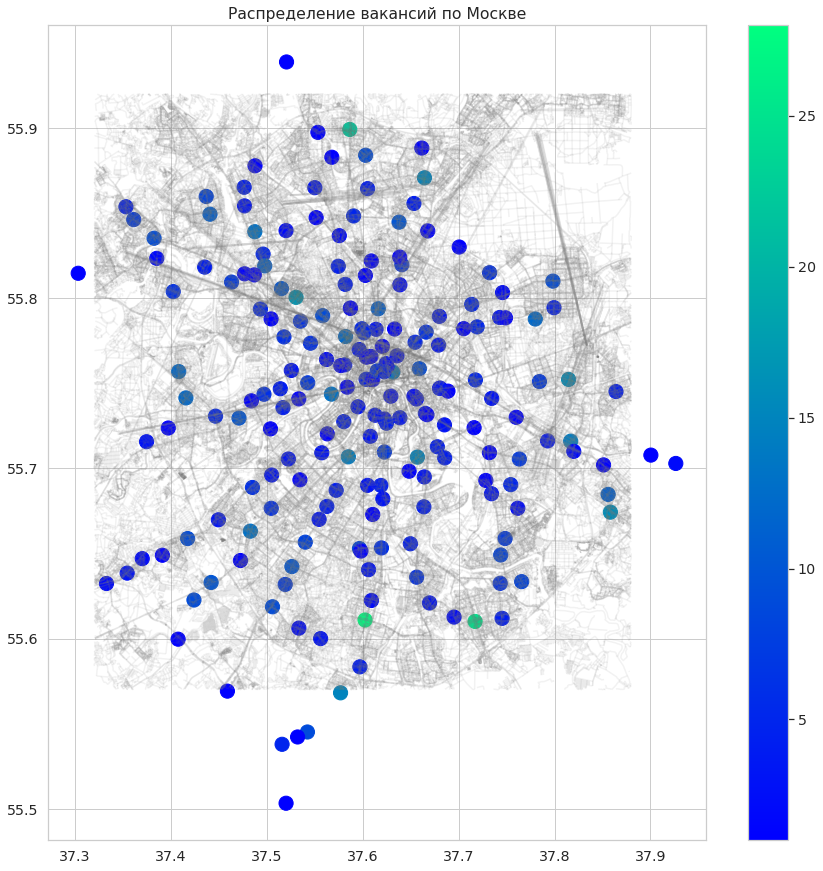

In [247]:
# Распределение вакансий по Москве
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.1, color="grey")

geo_df.plot(column="name", ax=ax, legend=True, markersize=200, cmap="winter")

ax.set_title("Распределение вакансий по Москве")

plt.show()

Тут распределение довольно равномерное.

Какие выводы можно сделать из построенных графиков?

Все выводы приведины прямо под графиками.

**Замечание в тему.** Многие из вас наверняка сейчас уже начинают задумываться о работе. Конечно, вы имеете на это полное право. Однако, по нашему опыту работа на 3 курсе отрицательно сказывается на степени усвоения материала. По сути все предметы цикла Data Science у вас еще впереди. Подумайте, наверное, лучше разобраться во всем во время учебы, чем потом что-то где-то нагонять. Более простой вариант &mdash; летняя стажировка, но не забудьте отдохнуть, набравшись сил перед непростым 3 курсом ☺.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 4.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

---
### Задача 5.

В данной задаче вам предстоит распарсить сайт, который вы выберите.

**1.** Каждая ссылка (URL) в интернете состоит из нескольких компонент:

* схема, *например, `http` или `https`*,
* хост, *наример, `en.wikipedia.org`*
* путь, по которому находится информация,
* параметры,
* якорь &mdash; указание фрагмента страницы.

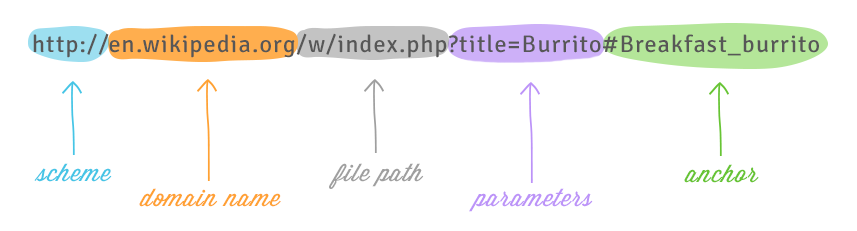

Одна и та же ссылка может иметь несколько форм и вести на ту же самую страницу. Во время обхода сайта это надо учитывать и сохранять один уникальный урл для каждой страницы. Процедура, приводящая урл к каноничному виду, называется нормализацией.
Процедуры, которые применяются к урлу для нормализации, описаны, например, на <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_URL">Википедии</a>.

Установите пакет `url_normalize`, в котором есть готовая функция для нормализации.

Прочитайте, как именно функция `url_normalize` меняет ссылку, и приведите примеры $4$ урлов, которые нормализуются к одному и тому же. Примеры должны демонстрировать различные этапы процедуры нормализации. Одним из этих примеров может быть сам нормализованный урл.

In [ ]:
from url_normalize import url_normalize

In [ ]:
...

_____________
Изучите код, в котором скачиваются страницы сайта `simple.wikipedia.org` с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятия про парсинг данных</a>. Код, реализующий обход в ширину с фильтрацией и нормализацией урлов, приведён в виде функции.

In [ ]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from bs4 import BeautifulSoup
from queue import Queue
import time

Код обхода в ширину:

In [ ]:
def load_web_pages(seed, max_downloads, filtration_function):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put(seed)

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        main_url = url_normalize(q.get())
        if main_url in already_visited:
            continue
        already_visited.add(main_url)
        html = download_from_the_internet(main_url)

        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        time.sleep(1)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        pages_json.append(text_info)

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put(child)
                
    return pages_json

**2.** Выберите сайт, который вам интересен, а также некоторую категорию страниц в нём. Поймите, с какой страницы сайта надо начать обход, чтобы обходить сайты данной категории.

*Пример: ищем статьи про Data Science на Википедии, начинаем со статьи Data Dcience*.

**Укажите, что выбрали:** <...>

Придумайте критерий, который по тексту из HTML-страницы будет определять, находится ли страница в определённой вами категории.

*Пример: статья на Википедии про Data Science, если в ней есть слово "data" или термины из статистики, теории вероятностей и анализа данных*.

**Опишите критерий:** <...>

Начав с выбранной страницы, скачайте не менее $500$ страниц сайта. В качестве функции фильтрации возьмите функцию, которая отделяет страницы с выбранного сайта от других.

In [ ]:
...

Cделайте таблицу со следующей информацией:

* количество слов в тексте статьи;
* принадлежит ли страница выбранной категории.

Для последнего пункта можете воспользоваться функцией поиска слов по заданным префиксам, рассмотренной на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятии</a>.

In [ ]:
...

Определите, какой процент скачанных страниц принадлежит выбранной категории?

In [ ]:
...

C помощью гистограмм сравните визуально распределения количества слов в статьях из выбранной категории и во всех остальных. Для этих двух распределений вычислите средние, медианы и дисперсии. Средние и медианы отобразите на графиках с гистограммами. Сделайте выводы.

In [ ]:
...

Постройте boxplot-графики для того, чтобы сравнить эти 2 распределения. Какой способ сравнения кажется вам более удобным?

In [ ]:
...

**3.** При помощи `plotly` визуализируйте скачанные страницы сайта. В качестве значений по осям возьмите количество слов на странице и количество ссылок на ней. Цветом обозначьте принадлежность выбранной вами категории. При наведении курсора на точку, обозначающую страницу, должна появляться подсказка с названием этой страницы.

In [ ]:
...

**4.** Предложите функцию фильтрации web-страниц, которую нужно подать в `load_web_pages`, чтобы среди скачанных сайтов был больше процент страниц из выбранной вами категории.

In [ ]:
...

Скачайте снова не менее $500$ страниц, но уже с новой функцией фильтрации. Добавьте следующую информацию к каждой странице:

* глубина в обходе,
* время скачивания страницы.

Для замера времени можете воспользоваться функцией `time` из пакета `time`.

In [ ]:
...

Постройте гистограмму и ядерную оценку плотности для времени скачивания страницы.

In [ ]:
...

Какими известными вам стандартными распределениями оно может быть приближено? Найдите оценку параметров этого распределения по методу моментов и отобразите на графике плотность с полученными значениями параметров.

*Замечание.* Результат сильно зависит от сайта, железа и прочих характеристик. По идее должно получится неплохое приближение чем-то из того, что вам известно. Но если ничего не получится, то просто оставьте и прокомментируйте ваши попытки разобраться.

In [ ]:
...

**Выводы:** <...>